In [ ]:
# ## un-comment out if running locally

# import os
# os.chdir('../')

In [1]:
## if running locally, comment out the following code

!git clone https://github.com/nicktfranklin/SEM3.git
import os
os.chdir('./SEM3/')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from core.sem import SEM
from core.event_models import NonLinearEvent
from core.hrr import * # need basically everything from the HRR library


from tqdm import tnrange

sns.set_context('paper', font_scale=1.5)

TensorFlow Version: 1.14.0
TensorFlow Check Passed


In [3]:
np.random.seed(0)

# figure out how many dimensions we need using plates formula
n = 18   # number of atomic values in the language
k = 6;      # maximum number of terms to be combined
err = 0.02; # error probability

d = plate_formula(n, k, err)

def embed(d):
    return np.random.randn(1, d) / np.sqrt(d)

verb_property = embed(d) * 1.00
noun_property = embed(d) * 1.00

words = {
    'Ask': embed(d),
    'Answer':  embed(d),
    'Chase': embed(d),
    'Tom': (embed(d) + noun_property),
    'Charan':(embed(d) + noun_property),
    'Jill': (embed(d) + noun_property),
    'Talia': (embed(d) + noun_property),
    'Tony': (embed(d) + noun_property),
    'Clarisa': (embed(d) + noun_property),
    'Bruce': (embed(d) + noun_property),
    'Dick': (embed(d) + noun_property),
    'Dog': (embed(d) + noun_property),
    'Cat': (embed(d) + noun_property),
}

roles = {
    'Agent': embed(d),
    'Patient': embed(d),
    'Verb': embed(d)
}


dict_keys(['Ask', 'Answer', 'Chase', 'Tom', 'Charan', 'Jill', 'Talia', 'Tony', 'Clarisa', 'Bruce', 'Dick', 'Dog', 'Cat'])


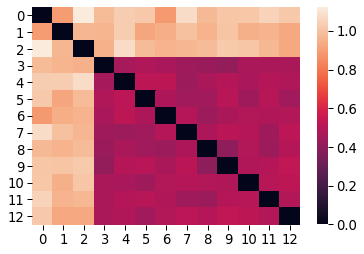

In [4]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

keys =  words.keys()
print(keys)
sns.heatmap(cosine_distances([words[w].reshape(-1) for w in keys]))

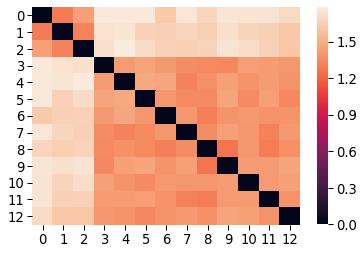

In [5]:
sns.heatmap(euclidean_distances([words[w].reshape(-1) for w in keys]))

In [6]:
sentences = [
    ['Ask', 'Tom', 'Charan'], ['Answer', 'Charan', 'Tom'],
#     ['Ask', 'Tom', 'Jill'],  ['Answer', 'Jill', 'Tom'],
#     ['Ask', 'Tom', 'Talia'],  ['Answer', 'Talia', 'Tom'],
#     ['Ask', 'Tom', 'Tony'],  ['Answer', 'Tony', 'Tom'],
#     ['Ask', 'Tom', 'Clarisa'],  ['Answer', 'Clarisa', 'Tom'],

#     ['Ask', 'Charan', 'Tom'], ['Answer', 'Tom', 'Charan'],
#     ['Ask', 'Charan', 'Jill'],  ['Answer', 'Jill', 'Charan'],
#     ['Ask', 'Charan', 'Talia'],  ['Answer', 'Talia', 'Charan'],
#     ['Ask', 'Charan', 'Tony'],  ['Answer', 'Tony', 'Charan'],
#     ['Ask', 'Charan', 'Clarisa'],  ['Answer', 'Clarisa', 'Charan'],

    ['Ask', 'Jill', 'Talia'], ['Answer', 'Talia', 'Jill'],
#     ['Ask', 'Jill', 'Tom'], ['Answer', 'Tom', 'Jill'],
#     ['Ask', 'Jill', 'Charan'], ['Answer', 'Charan', 'Jill'],
#     ['Ask', 'Jill', 'Tony'], ['Answer', 'Tony', 'Jill'],
#     ['Ask', 'Jill', 'Clarisa'],  ['Answer', 'Charan', 'Jill'],

#     ['Ask', 'Talia', 'Tom'],  ['Answer', 'Tom', 'Talia'],
#     ['Ask', 'Talia', 'Jill'], ['Answer', 'Jill', 'Talia'],
#     ['Ask', 'Talia', 'Charan'],  ['Answer', 'Charan', 'Talia'],
#     ['Ask', 'Talia', 'Tony'],  ['Answer', 'Tony', 'Talia'],
#     ['Ask', 'Talia', 'Clarisa'],  ['Answer', 'Clarisa', 'Talia'],

#     ['Ask', 'Tony', 'Tom'], ['Answer', 'Tom', 'Tony'],
#     ['Ask', 'Tony', 'Jill'], ['Answer', 'Jill', 'Tony'],
#     ['Ask', 'Tony', 'Charan'],  ['Answer', 'Charan', 'Tony'],
#     ['Ask', 'Tony', 'Talia'],  ['Answer', 'Talia', 'Tony'],
    ['Ask', 'Tony', 'Clarisa'],  ['Answer', 'Clarisa', 'Tony'],
    
#     ['Ask', 'Clarisa', 'Tom'], ['Answer', 'Tom', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Jill'], ['Answer', 'Jill', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Charan'],  ['Answer', 'Charan', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Talia'],  ['Answer', 'Talia', 'Clarisa'],
#     ['Ask', 'Clarisa', 'Tony'],  ['Answer', 'Tony', 'Clarisa'],
]

x_train = []
for s in sentences:
    x_train.append(
        encode(words[s[0]], roles['Verb']) 
            + encode(words[s[1]], roles['Agent']) 
            + encode(words[s[2]], roles['Patient'])
    )
    
test_a = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Charan'], roles['Agent']) 
        + encode(words['Tom'], roles['Patient']),
]


test_b = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Bruce'], roles['Agent']) 
        + encode(words['Dick'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Dick'], roles['Agent']) 
        + encode(words['Bruce'], roles['Patient'])  
]

test_c = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Chase'], roles['Verb']) 
        + encode(words['Dog'], roles['Agent']) 
        + encode(words['Cat'], roles['Patient']),
]

test_d = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
]

test_e = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Bruce'], roles['Agent']) 
        + encode(words['Dick'], roles['Patient']),
]

test_a2x = [
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Charan'], roles['Agent']) 
        + encode(words['Tom'], roles['Patient']),
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Bruce'], roles['Agent']) 
        + encode(words['Dick'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Dick'], roles['Agent']) 
        + encode(words['Bruce'], roles['Patient'])  
]


In [7]:
def angle_cos(x, y):
    return np.dot(x, y.T) / (np.linalg.norm(x) * np.linalg.norm(y))

print(angle_cos(test_a[0], test_a[1]))
print(angle_cos(test_a[0], test_b[1]))
print(angle_cos(test_a[0], test_c[1]))
print(angle_cos(test_a[0], test_d[1]))
print(angle_cos(test_a[0], test_e[1]))

[[0.53242548]]
[[0.48624008]]
[[0.38575729]]
[[1.]]
[[0.66631505]]


In [8]:
np.linalg.norm(np.dot(test_a[0], test_b[1].T), axis=1)

array([2.63482798])

In [9]:
np.linalg.norm(np.dot(test_a[0], test_c[1].T), axis=1)

array([2.02766492])

In [10]:
# SEM parameters
# df0 = 1.0
# mode = 0.15
df0 = 100.0
mode = 0.295  ## value from the paper (and different tensorflow version) 0.305
scale0 = (mode * (df0 + 2)) / df0

lmda = 1.0  # stickyness parameter
alfa = 2.  # concentration parameter


f_class = NonLinearEvent
# f_class = LinearDynamicSystem
f_opts=dict(var_scale0=scale0, var_df0=df0, dropout=0.5, n_hidden = d, n_epochs=100,
           prior_log_prob=2.0)

sem_kwargs = dict(lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts)

_x = np.concatenate(x_train, axis=0)
event_types = np.array([0] * len(x_train))
event_boundaries = np.array([1, 0] * len(x_train))

sem_model = SEM(**sem_kwargs)

In [11]:
def print_evalute(x, event_model, metric=euclidean_distances):
    print("t=0, f0={}, origin={}".format(
        metric(event_model.predict_f0(), x[0])[0][0], metric(np.zeros((1, d)), x[0])[0][0]))
    print("t=1, f(x)={}, f0={}, origin={}".format(
        metric(event_model.predict_next_generative(x[0]), x[1])[0][0],
        metric(event_model.predict_f0(), x[1])[0][0],
        metric(np.zeros((1, d)), x[1])[0][0]))
    
def print_models_likelihood(x, event_model_0, event_model_1):
    print("t=0, p(f0_a)={}, p(f0_a)={}".format(
        event_model_0.log_likelihood_f0(x[0]),
        event_model_1.log_likelihood_f0(x[0])
    ))
    print("t=1, p(f(x)_a)={}, p(f0_a)={}, p(f0_b)={}".format(
        event_model_0.log_likelihood_sequence(x[0], x[1]), 
        event_model_0.log_likelihood_f0(x[1]),
        event_model_1.log_likelihood_f0(x[1])
    )
)

# Test Case A

In [12]:
# Ask(Tom, Charan) -> Answer(Charan, Tom)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
print(sem_model.event_models[0].Sigma.mean())
sem_model._update_state(np.concatenate(test_a), 3)
sem_model.run(np.concatenate(test_a), compile_model=False)

results = [
    {
        'Test Case': 'Answer(Charan,Tom)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
]

print(np.exp(sem_model.results.log_boundary_probability))
print(sem_model.results.e_hat)

W0819 14:51:07.869517 4423648704 deprecation_wrapper.py:119] From /Users/nicholasfranklin/OneDrive/Projects/SEM3/core/sem.py:83: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0819 14:51:07.882706 4423648704 deprecation_wrapper.py:119] From /Users/nicholasfranklin/OneDrive/Projects/SEM3/core/sem.py:84: The name tf.keras.backend.set_session is deprecated. Please use tf.compat.v1.keras.backend.set_session instead.

Pretraining:   0%|          | 0/6 [00:00<?, ?it/s]W0819 14:51:07.905297 4423648704 deprecation.py:506] From /Users/nicholasfranklin/anaconda3/envs/sem3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Run SEM:   0%|          | 0/2 [00:00<?, ?it/s]

0.14196955076640022


Run SEM: 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

[1.00000000e+00 2.91996809e-07]
[0 0]


[0.00000000e+00 1.56092461e-07]


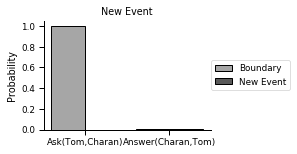

In [13]:
sns.set_context('paper', font_scale=1.0)

def plot_results(results, x_labels):
    fig, ax = plt.subplots(1, 1, figsize=(3.0, 2.0), sharey=True)
    w = 0.4
    
    y = np.exp(sem_model.results.log_boundary_probability)
    ax.bar([0-w/2., 1.-w/2.], y, facecolor=[0.65, 0.65, 0.65], width=w, edgecolor='k', lw=1, label='Boundary')
    ax.set_ylabel('Probability')
    ax.set_title('Boundary')
    ax.set_title('New Event')
    
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(x_labels, rotation=0)
    
    y = 1-results.post[:, 0]
    print(y)
    ax.bar([0+w/2., 1.+w/2.], y, facecolor=[0.35, 0.35, 0.35], width=w, edgecolor='k', lw=1, label='New Event')


    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
    sns.despine()
    
plot_results(sem_model.results, 'Ask(Tom,Charan) Answer(Charan,Tom)'.split(' '))
# plt.savefig('generalization_test_case_a.png', dpi=300, bbox_inches='tight')

In [14]:
sem_model.results.post[:, 0]

array([1.        , 0.99999984])

In [15]:
print(sem_model.results.restart_prob, sem_model.results.repeat_prob)

2.6885131233166444 18.43050268860528


In [16]:
print(sem_model.results.log_like)

[[ 0.                -inf        -inf]
 [16.35106131  2.                -inf]]


In [17]:
print(sem_model.results.log_prior)

[[2.               -inf       -inf]
 [2.01490302 0.69314718       -inf]]


In [18]:
print_evalute(test_a, sem_model.event_models[0])

t=0, f0=0.8198342881166145, origin=2.484382218071772
t=1, f(x)=0.22791950501949632, f0=2.1006654387666375, origin=2.41267799517429


In [19]:
print_models_likelihood(test_a, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=15.252987803631157, p(f0_a)=2.0
t=1, p(f(x)_a)=17.47725387822939, p(f0_a)=1.8316294574543974, p(f0_b)=2.0


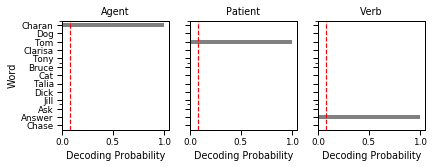

<Figure size 432x288 with 0 Axes>

In [20]:
# check the decoding here
# from sem import decode
from scipy.linalg import norm
from scipy.special import logsumexp

gamma = 50.0

agent = decode(sem_model.results.x_hat[1], roles['Agent'])
patient = decode(sem_model.results.x_hat[1], roles['Patient'])
verb = decode(sem_model.results.x_hat[1], roles['Verb'])


_df = []
for w in words.keys():
    _df.append({
        'Word': w,
        'Agent Prob': gamma * -cosine_distances(agent, words[w])[0][0],
        'Patient Prob': gamma * -cosine_distances(patient, words[w])[0][0],
        'Verb Prob': gamma * -cosine_distances(verb, words[w])[0][0],
    }) 
_df = pd.DataFrame(_df)
_df['Agent Prob'] =np.exp( _df['Agent Prob'] - logsumexp(_df['Agent Prob']))
_df['Patient Prob'] =np.exp( _df['Patient Prob'] - logsumexp(_df['Patient Prob']))
_df['Verb Prob'] =np.exp( _df['Verb Prob'] - logsumexp(_df['Verb Prob']))

# plot
fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.0), sharey=True)
_df.sort_values('Agent Prob', inplace=True)
_df.plot(x='Word', y='Agent Prob', kind='barh', color='grey', ax=axes[0], legend=None, title='Agent')
_df.plot(x='Word', y='Patient Prob', kind='barh', color='grey', ax=axes[1], legend=None, title='Patient')
_df.plot(x='Word', y='Verb Prob', kind='barh', color='grey', ax=axes[2], legend=None, title='Verb')

for ax in axes:
    ax.plot([1. / len(_df), 1. / len(_df)], plt.gca().get_ylim(), c='r', ls='--')
    ax.set_xlabel('Decoding Probability')
plt.show()
plt.savefig('DecodingA.png', dpi=300, bbox_iunches='tight')

In [21]:
from scipy.stats import multivariate_normal


print(multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma)))
print(multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma)))

17.585701468288942
4.691813419444323


In [22]:
a = multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma))
b = multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma))
z = logsumexp([a, b])
print(np.exp(a - z), np.exp(b - z))
print(np.exp(a - b))

0.9999974866412772 2.51335872417538e-06
397872.96458024357


# Test Case B

In [23]:
# Ask(Bruce, Dick) -> Answer(Dick, Bruce)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_b), 3)
sem_model.run(np.concatenate(test_b), compile_model=False)

results.append(
    {
        'Test Case': 'Answer(Dick,Bruce)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print(np.exp(sem_model.results.log_boundary_probability))
print(sem_model.results.e_hat)

Run SEM: 100%|██████████| 2/2 [00:01<00:00,  1.04s/it]

[1.         0.10579379]
[0 0]


[0.         0.00697174]


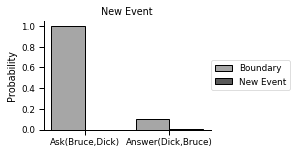

In [24]:
plot_results(sem_model.results, 'Ask(Bruce,Dick) Answer(Dick,Bruce)'.split(' '))
# plt.savefig('generalization_test_case_b.png', dpi=300, bbox_inches='tight')

In [25]:
sem_model.results.log_like

array([[0.       ,      -inf,      -inf],
       [5.6371384, 2.       ,      -inf]])

In [26]:
print(sem_model.results.restart_prob, sem_model.results.repeat_prob)

5.398076282197442 7.597254757653468


In [27]:
print_evalute(test_b, sem_model.event_models[0])

t=0, f0=1.1833900896917997, origin=2.2645149023624707
t=1, f(x)=0.29256655652753044, f0=1.9100694174018378, origin=2.181137766081979


In [28]:
print_models_likelihood(test_b, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=12.632415319591104, p(f0_a)=2.0
t=1, p(f(x)_a)=17.348171518900386, p(f0_a)=4.566649276887205, p(f0_b)=2.0


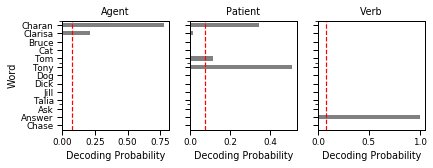

<Figure size 432x288 with 0 Axes>

In [29]:
# check the decoding here
agent = decode(sem_model.results.x_hat[1], roles['Agent'])
patient = decode(sem_model.results.x_hat[1], roles['Patient'])
verb = decode(sem_model.results.x_hat[1], roles['Verb'])


_df = []
for w in words.keys():
    _df.append({
        'Word': w,
        'Agent Prob': -gamma * cosine_distances(agent, words[w])[0][0],
        'Patient Prob': -gamma * cosine_distances(patient, words[w])[0][0],
        'Verb Prob': -gamma * cosine_distances(verb, words[w])[0][0],
    }) 
_df = pd.DataFrame(_df)
_df['Agent Prob'] =np.exp( _df['Agent Prob'] - logsumexp(_df['Agent Prob']))
_df['Patient Prob'] =np.exp( _df['Patient Prob'] - logsumexp(_df['Patient Prob']))
_df['Verb Prob'] =np.exp( _df['Verb Prob'] - logsumexp(_df['Verb Prob']))

# plot
fig, axes = plt.subplots(1, 3, figsize=(6.5, 2.0), sharey=True)
_df.sort_values('Agent Prob', inplace=True)
_df.plot(x='Word', y='Agent Prob', kind='barh', color='grey', ax=axes[0], legend=None, title='Agent')
_df.plot(x='Word', y='Patient Prob', kind='barh', color='grey', ax=axes[1], legend=None, title='Patient')
_df.plot(x='Word', y='Verb Prob', kind='barh', color='grey', ax=axes[2], legend=None, title='Verb')

for ax in axes:
    ax.plot([1. / len(_df), 1. / len(_df)], plt.gca().get_ylim(), c='r', ls='--')
    ax.set_xlabel('Decoding Probability')
plt.show()
plt.savefig('DecodingB.png', dpi=300, bbox_iunches='tight')

In [30]:
b_foil = encode(words['Answer'], roles['Verb']) \
        + encode(words['Bruce'], roles['Agent']) \
        + encode(words['Dick'], roles['Patient'])  
        
a = multivariate_normal.logpdf(test_a[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma))
b = multivariate_normal.logpdf(test_b[1].reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma))
b0 = multivariate_normal.logpdf(b_foil.reshape(-1), mean=sem_model.results.x_hat[1].reshape(-1), cov=np.diag(sem_model.event_models[0].Sigma))


z = logsumexp([a, b, b0])
print(np.exp(a - z), np.exp(b - z), np.exp(b0 - z))
print(np.exp(a - b), np.exp(b - b0))

0.9396306058903174 0.019332161818701905 0.04103723229098112
48.60452828308731 0.471088344399644


In [31]:
sem_model.results.log_boundary_probability

array([ 0.        , -2.24626347])

# Test Case C

In [32]:
# Ask(Tom, Charan) -> Chase(Dog, Cat)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_c), 3)
sem_model.run(np.concatenate(test_c), compile_model=False)

results.append(
    {
        'Test Case': 'Chase(Dog,Cat)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print(np.exp(sem_model.results.log_boundary_probability))
print(sem_model.results.e_hat)

Run SEM: 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

[1.         0.97597073]
[0 1]


[0.         0.87365425]


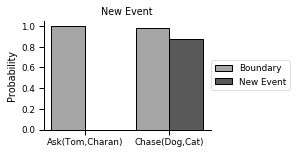

In [33]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Chase(Dog,Cat)'.split(' '))
# plt.savefig('generalization_test_case_c.png', dpi=300, bbox_inches='tight')

In [34]:
sem_model.results.log_like

array([[ 0.        ,        -inf,        -inf],
       [-1.25541831,  2.        ,        -inf]])

In [35]:
print_evalute(test_c, sem_model.event_models[0])

t=0, f0=0.9028873583576971, origin=2.484382218071772
t=1, f(x)=2.3365269813664433, f0=2.242270675379445, origin=2.115746507936774


In [36]:
print_models_likelihood(test_c, sem_model.event_models[0], sem_model.event_models[1])

t=0, p(f0_a)=13.523934383567479, p(f0_a)=-93.2144323938962
t=1, p(f(x)_a)=-2.9851571344595698, p(f0_a)=-1.4506193132903888, p(f0_b)=-82.07429581233146


# Test Case D

In [37]:
# Ask(Tom, Charan) -> Ask(Tom, Charan)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_d), 3)
sem_model.run(np.concatenate(test_d), compile_model=False)

results.append(
    {
        'Test Case': 'Ask(Tom,Charan)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print(np.exp(sem_model.results.log_boundary_probability))
print(sem_model.results.e_hat)

Run SEM: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

[1.         0.99999995]
[0 0]


[0.00000000e+00 2.01463639e-06]


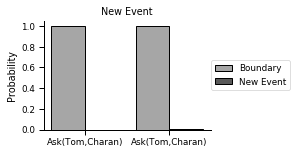

In [38]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Ask(Tom,Charan)'.split(' '))
# plt.savefig('generalization_test_case_d.png', dpi=300, bbox_inches='tight')

## Test Case E

In [39]:
# Ask(Tom, Charan) -> Ask(Tom, Charan)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_e), 3)
sem_model.run(np.concatenate(test_e), compile_model=False)

results.append(
    {
        'Test Case': 'Ask(Bruce, Dick)',
        'Boundary': np.exp(sem_model.results.log_boundary_probability)[1],
        'New Event': 1-sem_model.results.post[1, 0]
    }
)

print(np.exp(sem_model.results.log_boundary_probability))
print(sem_model.results.e_hat)

Run SEM: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

[1.         0.99977528]
[0 0]


[0.         0.00166116]


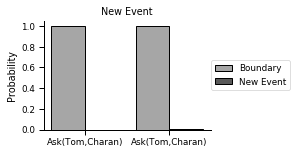

In [40]:
plot_results(sem_model.results, 'Ask(Tom,Charan) Ask(Tom,Charan)'.split(' '))
# plt.savefig('generalization_test_case_d.png', dpi=300, bbox_inches='tight')

# All test cases

In [41]:
results = pd.DataFrame(results)
results = results.loc[[0, 2, 1, 3, 4], ]
results.index = range(5)

In [42]:
results

,Boundary,New Event,Test Case
0,2.919968e-07,1.560925e-07,"Answer(Charan,Tom)"
1,9.759707e-01,8.736542e-01,"Chase(Dog,Cat)"
2,1.057938e-01,6.971740e-03,"Answer(Dick,Bruce)"
3,1.000000e+00,2.014636e-06,"Ask(Tom,Charan)"
4,9.997753e-01,1.661162e-03,"Ask(Bruce, Dick)"


In [43]:
x_labels = results['Test Case'].copy()


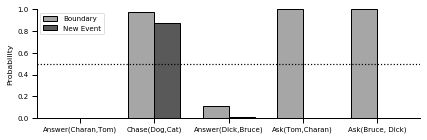

In [44]:
with sns.plotting_context('paper', font_scale=0.8):
    fig, ax = plt.subplots(1, 1, figsize=(6.875, 2.0), sharey=True)
    w = 0.35

    y = results.Boundary
    x = [x0 - w/2. for x0 in results.index]
    ax.bar(x, y, facecolor=[0.65, 0.65, 0.65], width=w, edgecolor='k', lw=1, label='Boundary')
    ax.set_ylabel('Probability')

    ax.set_xticks(results.index)
    ax.set_xticklabels(x_labels, rotation=0)

    y = results['New Event']
    x = [x0 + w/2. for x0 in results.index]
    ax.bar(x, y, facecolor=[0.35, 0.35, 0.35], width=w, edgecolor='k', lw=1, label='New Event')
    
    ax.axhline(y=0.5, ls=':', c='k')
    ax.set_ylim(0, 1)
    

    plt.legend(loc='upper left')
    sns.despine()
#     plt.savefig('generalization_demo_results.png', dpi=300)

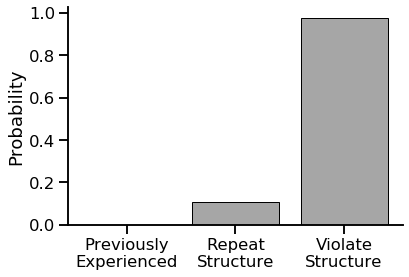

In [45]:
cases = (results['Test Case'] == 'Answer(Dick,Bruce)') | (results['Test Case'] ==  'Chase(Dog,Cat)') | (results['Test Case'] ==  'Answer(Charan,Tom)')
# results.loc[cases]

res_ = results.loc[cases].copy()
res_ = res_.loc[[0, 2, 1], :]

y = res_.Boundary
x = range(3)

with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, 1)
    ax.bar(x, y, facecolor=[0.65, 0.65, 0.65],  edgecolor='k', lw=1, label='Boundary')
    ax.set_ylabel('Probability')
    ax.set_xticks(x)
    ax.set_xticklabels(['Previously\nExperienced', 'Repeat\nStructure', 'Violate\nStructure'], rotation=0)
    sns.despine()
#     plt.savefig('StructureTalk.png', dpi=300, bbox_inches='tight')

In [46]:
res_

,Boundary,New Event,Test Case
0,2.919968e-07,1.560925e-07,"Answer(Charan,Tom)"
2,1.057938e-01,6.971740e-03,"Answer(Dick,Bruce)"
1,9.759707e-01,8.736542e-01,"Chase(Dog,Cat)"


# Reduced model: No clustering

In [47]:
words['See'] = embed(d)


test_a2x = [
    encode(words['See'], roles['Verb']) 
        + encode(words['Dog'], roles['Agent']) 
        + encode(words['Cat'], roles['Patient']),
    encode(words['Chase'], roles['Verb']) 
        + encode(words['Dog'], roles['Agent']) 
        + encode(words['Cat'], roles['Patient']),
    
    encode(words['Ask'], roles['Verb']) 
        + encode(words['Tom'], roles['Agent']) 
        + encode(words['Charan'], roles['Patient']),
    encode(words['Answer'], roles['Verb']) 
        + encode(words['Charan'], roles['Agent']) 
        + encode(words['Tom'], roles['Patient']),
]




# Ask(Tom, Charan) -> Answer(Charan, Tom)
sem_model = SEM(**sem_kwargs)
sem_model.pretrain(_x, event_types, event_boundaries)
print(sem_model.event_models[0].Sigma.mean())
sem_model._update_state(np.concatenate(test_a2x), 3)
sem_model.run(np.concatenate(test_a2x), compile_model=False)

new_results = [
    {
        'Model': 'SEM',
        'PE': sem_model.results.pe[-1] / sem_model.results.pe[-2]
    }
]

print(sem_model.results.surprise)

Run SEM:   0%|          | 0/4 [00:00<?, ?it/s]

0.14197844483904695


Run SEM: 100%|██████████| 4/4 [00:03<00:00,  1.11s/it]

[ 0.         -2.29669388  6.73651347 15.97331968]


In [48]:
sem_model.results.e_hat

array([0, 2, 0, 0])

In [49]:
sem_model.results.pe / np.linalg.norm(np.concatenate(test_a2x), axis=1).mean()

array([0.        , 1.07110349, 1.50703961, 0.15423782])

In [50]:
sem_model.results.pe / sem_model.results.pe[-2]

array([0.        , 0.71073347, 1.        , 0.1023449 ])

In [51]:
## these are the original parameters
# # SEM parameters
# df0 = 100.0
# mode = 0.305
# scale0 = (mode * (df0 + 2)) / df0
# print scale0

# lmda = 1.0  # stickyness parameter
# alfa = 2.  # concentration parameter


# prevent boundaries from being simulated by changing the CRP parameters
sem_kwargs_reduced_model = dict(lmda=10^6, alfa=10^-6, f_class=f_class, f_opts=f_opts)


# Ask(Tom, Charan) -> Answer(Charan, Tom)
sem_model = SEM(**sem_kwargs_reduced_model)
sem_model.pretrain(_x, event_types, event_boundaries)
sem_model._update_state(np.concatenate(test_a2x), 5)
sem_model.run(np.concatenate(test_a2x), compile_model=False)

new_results += [
    {
        'Model': 'Reduced',
        'PE': sem_model.results.pe[-1] / sem_model.results.pe[-2]
    }
]


Run SEM:   0%|          | 0/4 [00:00<?, ?it/s]/Users/nicholasfranklin/OneDrive/Projects/SEM3/core/sem.py:257: RuntimeWarning: invalid value encountered in log
  _post = np.log(prior[:len(active)]) + lik
Run SEM:  25%|██▌       | 1/4 [00:00<00:02,  1.43it/s]/Users/nicholasfranklin/OneDrive/Projects/SEM3/core/sem.py:286: RuntimeWarning: invalid value encountered in log
  p = np.log(prior[:len(active)]) + lik - np.max(lik)  # subtracting the max doesn't change proportionality
/Users/nicholasfranklin/OneDrive/Projects/SEM3/core/sem.py:291: RuntimeWarning: invalid value encountered in log
  log_prior[ii, :len(active)] = np.log(prior[:len(active)])
Run SEM: 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


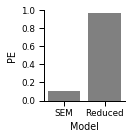

In [52]:
with sns.plotting_context('paper', font_scale=1.0):
    sns.catplot(data=pd.DataFrame(new_results), x='Model', y='PE', color='grey',
            height=2.0, kind='bar')
    plt.ylim([0, 1])
#     plt.savefig('generalization_demo_reduced_model2.png', dpi=300)

In [53]:
sem_model.results.pe / sem_model.results.pe[-2]

array([0.        , 0.72371233, 1.        , 0.96696029])